# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [5]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

a[3:6]

# reverse the list

list(reversed(a[3:6]))

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])

a_squared = [number ** 2 for number in a]
a_squared

[1, 4, 9, 16, 25, 36]

In [24]:
# create a numpy array from this list
import numpy as np
b = np.array(a)
b

array([1, 2, 3, 4, 5, 6])

In [7]:
# find the mean of b
np.mean(b)

3.5

In [8]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36], dtype=int32)

In [25]:
# change b from a length-6 list to a 2x3 matrix
b_1 = b.reshape(2, 3)
b_1

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
# find the mean value of each row
row_means = b_1.mean(axis=1)
row_means

array([2., 5.])

In [27]:
# find the mean value of each column
column_means = b_1.mean(axis=0)
column_means

array([2.5, 3.5, 4.5])

In [12]:
# find the third column of b
y = np.array(b_1)
y[:, 2]

array([3, 6])

In [13]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv("../data/starbucks.csv")
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,NaN,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,NaN,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,NaN,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,NaN,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,NaN,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,NaN,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [14]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df.Calories.mean()


193.87190082644628

In [15]:
# how many different categories of beverages are there?
df.Beverage_category.value_counts().count()

9

In [16]:
# what is the average # calories for each beverage category?
df.groupby('Beverage_category')['Calories'].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [17]:
# what beverage preparation includes the most sugar on average?
sugar_max = df.groupby('Beverage_prep')['Sugars (g)'].mean()
max(sugar_max)


55.6875

In [18]:
# what is the average % daily value calcium content for each beverage?
df.dtypes
df['Calcium (% DV)']
df['Calcium (% DV)'].str.slice(stop = -1).astype(int).mean()

20.75619834710744

In [19]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
group_1 = df.groupby('Beverage')['Calories']
group_2 = df.groupby('Beverage')['Protein (g)']
# If you want to bulk up but minimize calories, you could try setting the minimum limit for protein (g) to 16
# and from then select the drink you would like to have
df[df["Protein (g)"] > 16]  
# I recommend either the Banana Chocolate Smoothie (280 cal) or the Caffe Mocha (without whipped cream) that is
# also 280 calories which are both drinks with least amount of calories
# You can also have a look at the list of beverages corresponding to the min and max for each beverage
# By using this method, perhaps you would like a Caffe Latte?
find_minmax = df.groupby("Beverage")
find_minmax[["Calories", "Protein (g)"]].agg({"Calories": "min", "Protein (g)": "max"})

,Calories,Protein (g)
Beverage,,
Banana Chocolate Smoothie,280,20.0
Brewed Coffee,3,1.0
Caffè Americano,5,1.0
Caffè Latte,70,16.0
Caffè Mocha (Without Whipped Cream),110,17.0
Cappuccino,50,10.0
Caramel,100,5.0
Caramel (Without Whipped Cream),180,5.0
Caramel Apple Spice (Without Whipped Cream),140,0.0


<AxesSubplot:ylabel='Frequency'>

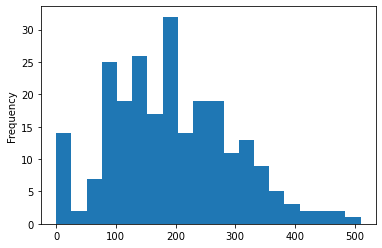

In [20]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df["Calories"].plot.hist(bins=20)

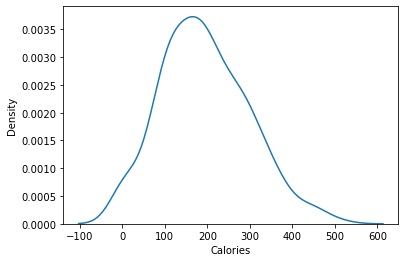

In [21]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
# df["Calories"].plot.hist(bins=20)
sns.kdeplot(df['Calories'])
plt.show()


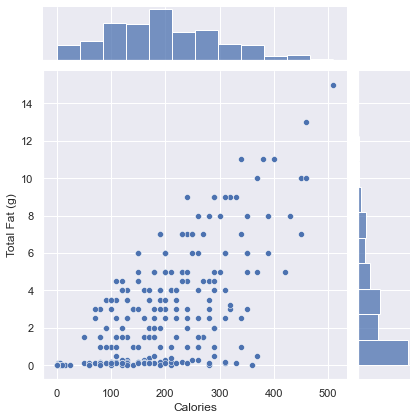

In [22]:
# plot calories against total fat using seaborn
sns.set()
sns.jointplot(data=df, x="Calories", y="Total Fat (g)")

<AxesSubplot:xlabel='Calories', ylabel='Beverage'>

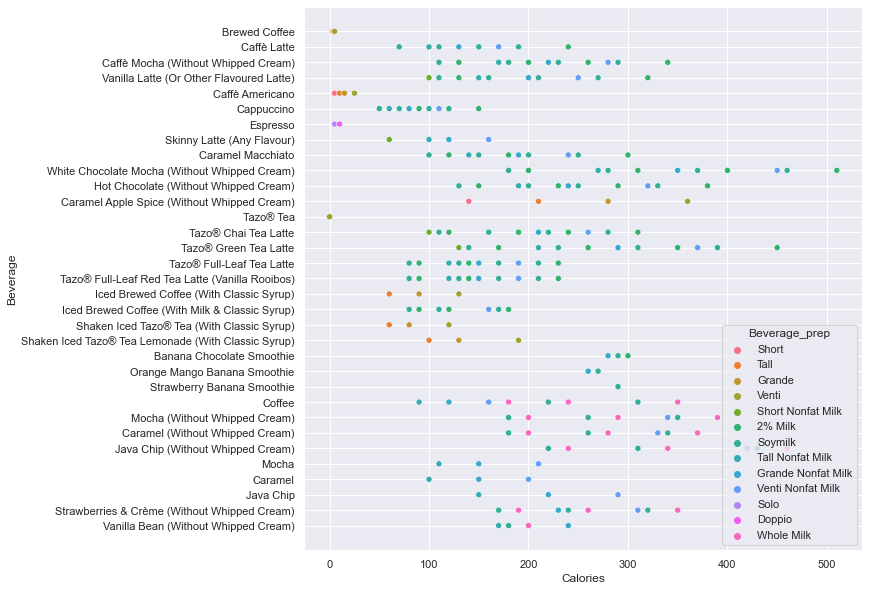

In [23]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="Calories", y="Beverage", hue="Beverage_prep")